# Check `binwidth`

In [1]:
from lets_plot import *


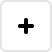
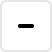
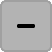
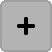
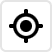
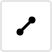
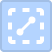
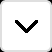
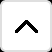
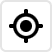
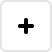
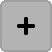
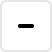
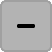
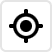
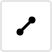
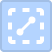
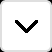
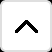
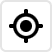

In [2]:
LetsPlot.setup_html()

## Identity Stat

In [3]:
data = {
    'x': [100, 140],
    'y': [2, 1],
    'bw': [60, 20],
}

parameters = {'stat': 'identity', 'color': 'black', 'fill': 'white'}
gggrid([
    ggplot(data, aes('x', 'y')) + geom_histogram(**parameters) + ggtitle("binwidth is not specified"),
    ggplot(data, aes('x', 'y')) + geom_histogram(aes(binwidth='bw'), **parameters) + ggtitle("aes(binwidth='bw')"),
    ggplot(data, aes('x', 'y')) + geom_histogram(binwidth=10, **parameters) + ggtitle("constant binwidth=10"),
], ncol=1)

## One Bin

In [4]:
def get_one_bin_plot(binwidth=None, center=None, boundary=None):
    data = {
        'x': [5, 5, 5]
    }
    return ggplot(data, aes(x='x')) + \
        geom_histogram(binwidth=binwidth, center=center, boundary=boundary) + \
        ggtitle(f"binwidth={binwidth}\ncenter={center}, boundary={boundary}")

gggrid([
    get_one_bin_plot(),
    get_one_bin_plot(binwidth=10),
    get_one_bin_plot(center=5),
    get_one_bin_plot(boundary=5),
], ncol=2)

## Conflicting `binwidth` and `breaks`

In [5]:
breaks = [0, 8, 12]
data = {
    'x': [2, 6, 10]
}

ggplot(data, aes(x='x')) + \
    geom_histogram(color="black", fill="white",
                   breaks=breaks,  # defined breaks -> calculates binwidths=[8, 4] for stat
                   binwidth=2)     # defined binwidth -> use const binwidth=2 in geom